In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data= pd.read_csv('homepricesmultilinear.csv')
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
data.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [4]:
med = data.bedrooms.median()  # filling null using median..we can use max,min,or directly input a value
data['bedrooms']=data['bedrooms'].fillna(med)
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


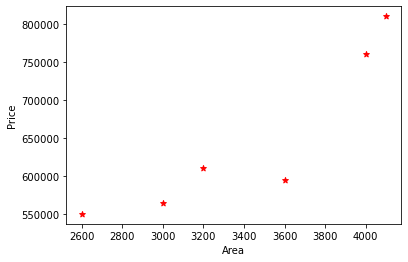

In [5]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(data.area , data.price , color='red', marker='*')

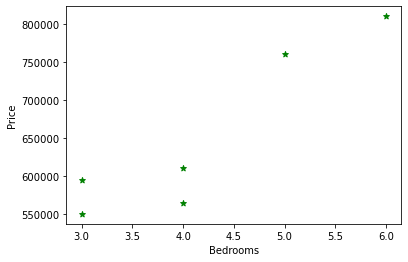

In [8]:
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.scatter(data.bedrooms , data.price , color='green', marker='*')

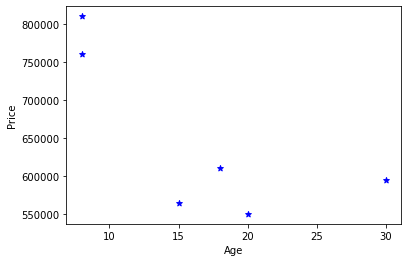

In [7]:
plt.xlabel('Age')
plt.ylabel('Price')
plt.scatter(data.age , data.price , color='blue', marker='*')

In [9]:
x=data.drop('price', axis=1)
y=data['price']

In [10]:
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [11]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [12]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [13]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [14]:
model.intercept_

221323.00186540384

In [15]:
model.predict([[4000,3,10]])

C:\Users\palla\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])

In [16]:
y_pred= model.predict(x)

In [17]:
y_pred

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

In [18]:
pd.DataFrame({'True y values:':y , 'Predicted y values':y_pred})

,True y values:,Predicted y values
0,550000,518217.632976
1,565000,602590.079374
2,610000,615307.414037
3,595000,597962.895832
4,760000,760663.426755
5,810000,795258.551027


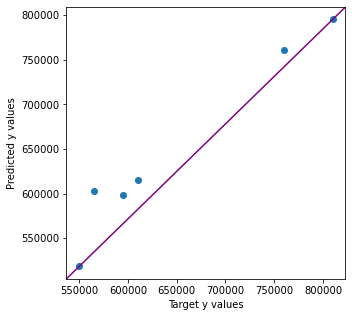

In [22]:
f , ax= plt.subplots(figsize=(5,5)) # create a figure and a set of subplots
ax.scatter(y,y_pred)

plt.xlabel('Target y values')
plt.ylabel('Predicted y values')

ax.plot([0,1],[0,1], transform=ax.transAxes , c='purple')

In [23]:
import seaborn as sns

In [24]:
correlation = data.corr()

In [25]:
correlation

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


<AxesSubplot:>

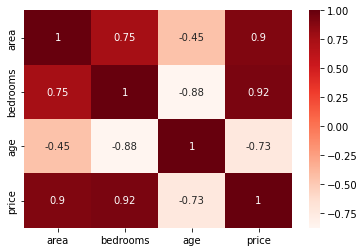

In [30]:
sns.heatmap(correlation , annot=True, cmap='Reds')    # annot--to specify exact values inside a heatmap

#
r2 score = 1-((y-y_pred)/(y-y_mean))

In [31]:
model.score(x,y) # r2 score or r-squared score

0.9550196399325819

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(y,y_pred)

446305128.22449297

## saving the model

In [40]:
import pickle

In [41]:
with open('reg_pickel','wb') as f:
    pickle.dump(model, f)

In [43]:
with open('reg_pickel','rb') as s:
    reg_loaded=pickle.load(s)

In [44]:
reg_loaded.predict([[4000,3,10]])

C:\Users\palla\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])

In [46]:
import joblib
joblib.dump(model, 'joblib model')
joblib_reloaded=joblib.load('joblib model')

In [47]:
joblib_reloaded.predict([[4000,3,10]])

C:\Users\palla\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([707422.23078143])